In [105]:
# 导入三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# 读取数据文件
df = pd.read_csv('./train.csv')

## 数据理解

In [107]:
# 查看数据集具体情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


### 各个字段的意思
- datetime 精确到小时的一个具体时间
- season 1.春天 2.夏天 3.秋天 4.冬天
- holiday 当天是否是节假日 0 不是 1 是
- workingday 当天是否是工作日 0 不是 1 是
- weather 天气情况
    - 1 晴，少云，半阴，半阴
    - 2 雾+多云，雾+碎云，雾+几云，雾
    - 3 小雪，小雨+雷雨+散云，小雨+散云
    - 4 大雨+冰雹+雷暴+雾，雪+雾
- temp 具体温度
- atemp 体感温度
- humidity 相对湿度
- windspeed 风速
- casual 用车的未注册用户的数量
- registered 用车的已注册用户的数量
- count 用车人数总数

In [108]:
# 看一下前五条，看具体的数据情况
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [109]:
# 再更具体的查看信息
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


现在可以看到没有什么特别离谱的数字，比如season最大是4也符合我们范围，假期工作日天气等等，还可以留意一下每小时大概是190人租车（参考count的平均值）

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F8D3C7518>,
      dtype=object)

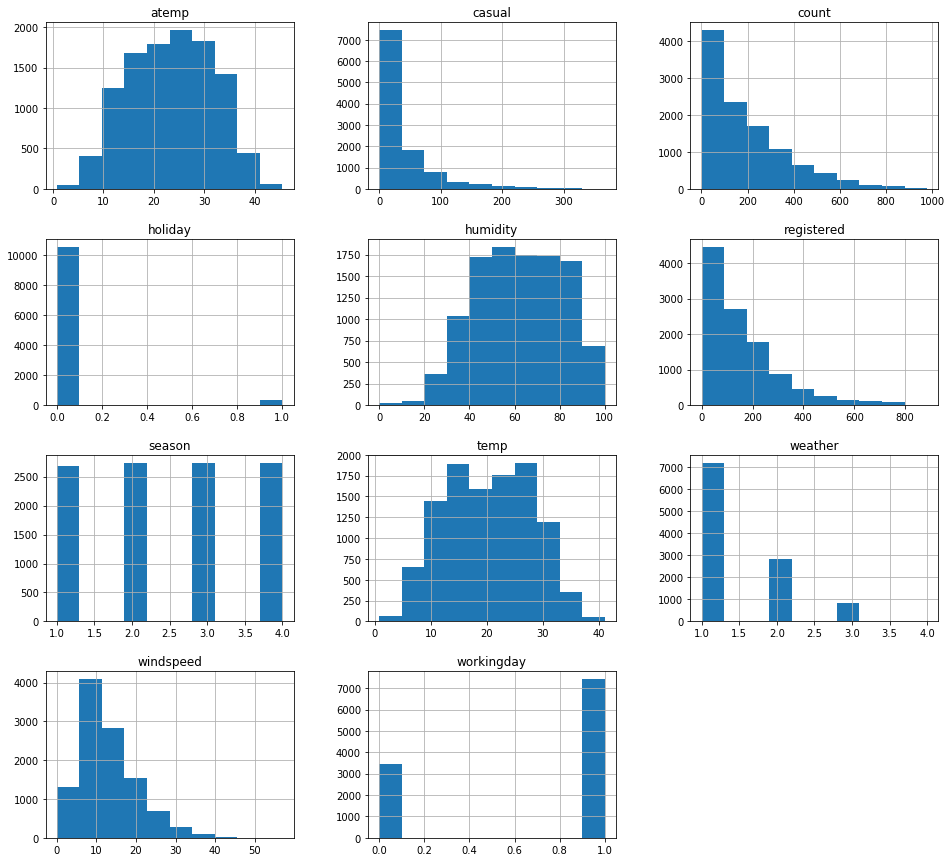

In [110]:
df.hist(figsize=(16,15))    # 使用hist查看每一列的分布直方图

In [111]:
# 查看相关度
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


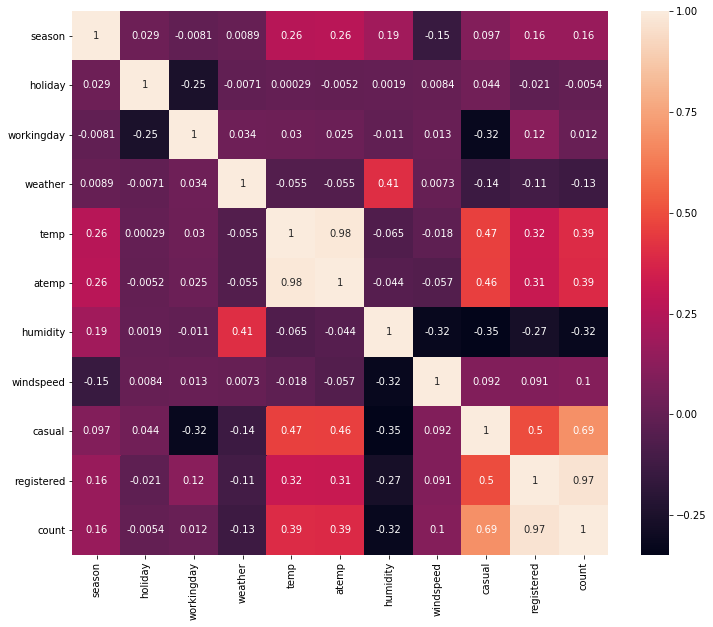

In [112]:
# 使用热度图可视化这个相关系数矩阵
# 要先导入seaborn包 Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表
import seaborn as sns
corr = df.corr()
plt.subplots(figsize=(12,10))  # 设置画布大小
# annot默认为False，当annot为True时，会在heatmap中每个方格写入数据，更便于查看
sns.heatmap(corr, annot=True)

## 数据预处理

In [113]:
# 为了保险起见，我们还是复制一份副本来预处理，出问题了我们有原版
# deep参数默认为True，原值不会随复制的副本的改变而改变，但是为了保险还是写上True
df_copy = df.copy(deep=True)

In [114]:
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


### 日期处理

In [116]:
# 先把这个日期处理一下
# 分为月 周几 小时 pd.DatetimeIndex 是把某一列进行转换，同时把该列的数据设置为索引 index
df_copy['month'] = pd.DatetimeIndex(df_copy.datetime).month
# 周末可能和周一到周五的不一样 所以提取一下是星期几 0-6 周一到周日
df_copy['day'] = pd.DatetimeIndex(df_copy.datetime).weekday
df_copy['hour'] = pd.DatetimeIndex(df_copy.datetime).hour

In [117]:
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [118]:
# 既然把datetime拆分为了三列，就可以把原来这个删除了
df_copy = df_copy.drop(['datetime'], axis=1)

In [119]:
# 查看一下具体信息
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [120]:
df_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


### 缺失值处理

In [121]:
df_copy.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hour          0
dtype: int64

可以看到是没有缺失值的，所以可以先不必处理，再看看有没有异常值

### 异常值处理

season           AxesSubplot(0.125,0.749828;0.227941x0.130172)
holiday       AxesSubplot(0.398529,0.749828;0.227941x0.130172)
workingday    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
weather          AxesSubplot(0.125,0.593621;0.227941x0.130172)
temp          AxesSubplot(0.398529,0.593621;0.227941x0.130172)
atemp         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
humidity         AxesSubplot(0.125,0.437414;0.227941x0.130172)
windspeed     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
casual        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
registered       AxesSubplot(0.125,0.281207;0.227941x0.130172)
count         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
month         AxesSubplot(0.672059,0.281207;0.227941x0.130172)
day                 AxesSubplot(0.125,0.125;0.227941x0.130172)
hour             AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

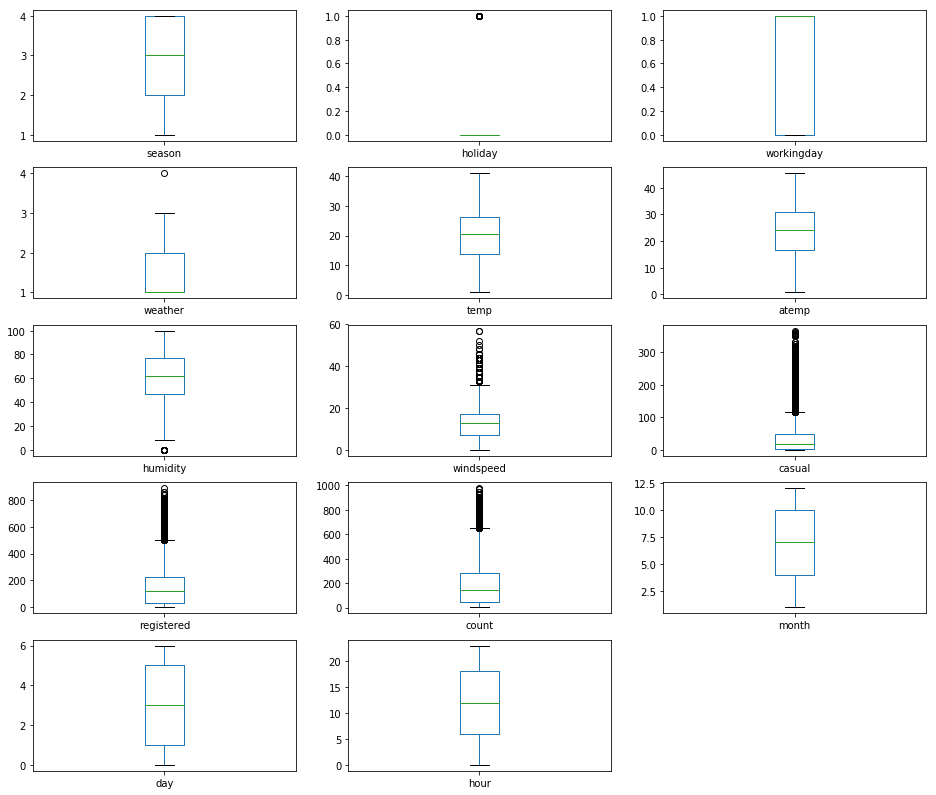

In [122]:
# 画出每个特征的箱图，分析离群点
df_copy.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False, figsize=(16,14))# 每个特征的箱图

可以看到windspeed风速是存在异常值的，对于未注册用车用户，和已注册用车用户对结果count没有作用，因为是先统计出来count再统计的这两个字段，所以没有实际作用，在给出预测数据的时候也不会提供这两个字段的值，所以对这两个字段不予处理，后续会删除，对于count再进行后续分析。

In [123]:
# 处理风速的异常值
a = df_copy["windspeed"].quantile(0.75)
b = df_copy["windspeed"].quantile(0.25)
# 直接用的 “=” ，修改c的时候也会修改原数据集
c = df_copy["windspeed"]
# 超过了上四分位1.5倍四分位距或下四分位1.5倍距离都算异常值，先设置为空值
c[(c>=(a-b)*1.5+a)|(c<=b-(a-b)*1.5)]=np.nan
# 用中位数填充空值
c.fillna(c.median(),inplace=True)

D:\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


{'whiskers': [<matplotlib.lines.Line2D at 0x16f8fc5c518>,
 'caps': [<matplotlib.lines.Line2D at 0x16f8fc5cba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f8fc5c0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f8fc5cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f8fc7d5c0>],
 'means': []}

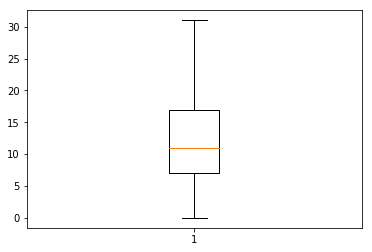

In [124]:
# 处理后的风速的箱线图
plt.boxplot(df_copy['windspeed'])

可以看到风速这一列已经被处理完成

In [125]:
a = df_copy["count"].quantile(0.75)
b = df_copy["count"].quantile(0.25)
c = df_copy["count"]
# 查看异常值的个数
c[(c>=(a-b)*1.5+a)|(c<=b-(a-b)*1.5)].value_counts().sum()

303

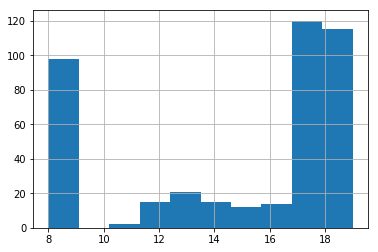

In [126]:
# 查看一下count中异常值真的是是异常值吗
df_copy.loc[df_copy['count'] > 600 ]['hour'].hist()

这个明显是早高峰和晚高峰，上下班的时间点，不太算异常值，但是还是查看一下下午五六点的时候租车数量是多少，如何分布。

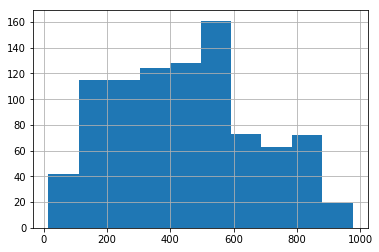

In [127]:
df_copy.loc[(df_copy['hour'] == 18) | (df_copy['hour'] == 17) ]['count'].hist()

看分布来看的话，平时都是200-600，偶尔租车数量增加也是可以理解的，所以不处理count这一列了

In [128]:
df_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [129]:
# 现在只剩下注册用户和非注册用户，这两列直接做删除处理
df_copy = df_copy.drop(['casual','registered'], axis=1)
df_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


数据预处理完毕，开始建模
## 建模

In [130]:
# 首先要明确这个是一个什么问题，对于租车数量的预测，目标变量是连续值，所以这是一个回归问题
# 对于回归问题的建模 使用sklearn里面的 支持向量机 和 随机森林 分别建模
# 分训练集和测试集，数据量还是比较多的（一万多条）所以直接按照常规划分方式，就不用k折交叉验证了
y = df_copy['count'].values
x = df_copy.drop(['count'], axis=1).values
from sklearn.model_selection import train_test_split
# 设置一下随机种子，这样无论运行几次分测试集训练集都是相同的
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [131]:
print('训练数据集特征：', x_train.shape,
     '测试数据集特征：', x_test.shape)
print('训练数据集标签：', y_train.shape,
     '测试数据集标签：', y_test.shape)

训练数据集特征： (8708, 11) 测试数据集特征： (2178, 11)
训练数据集标签： (8708,) 测试数据集标签： (2178,)


In [132]:
# 随机森林建模
from sklearn.ensemble import RandomForestRegressor
# 树的个数设置为100
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
# 看看这个模型如何
# score 得分 计算的是模型的R方值
print("训练集得分:{},测试集得分:{}".format(rf_model.score(x_train, y_train),rf_model.score(x_test, y_test)))

训练集得分:0.9813285128503214,测试集得分:0.863708126648876


In [134]:
# 支持向量机建模
from sklearn import svm
# C 惩罚系数 越大 越不允许误差存在 容易过拟合 趋于0的时候 越允许误差 容易欠拟合
# gamma 核函数系数 越大越容易过拟合 越小越容易欠拟合
# 尝试了多次得出来这一组参数表现还是不错的
s_model = svm.SVR(kernel='rbf', C=10, gamma=0.01)
s_model.fit(x_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [135]:
# 看看如何
print("训练集得分:{},测试集得分:{}".format(s_model.score(x_train, y_train),s_model.score(x_test, y_test)))

训练集得分:0.48326901264090344,测试集得分:0.4566693270434443


In [136]:
# 模型评估
from sklearn.metrics import explained_variance_score
y_pred = rf_model.predict(x_test)
print('随机森林回归模型的可解释方差值为：',
     explained_variance_score(y_test,y_pred))
y_pred = s_model.predict(x_test)
print('支持向量机回归模型的可解释方差值为：',
     explained_variance_score(y_test,y_pred))

随机森林回归模型的可解释方差值为： 0.8639067888438334
支持向量机回归模型的可解释方差值为： 0.5057675076091652


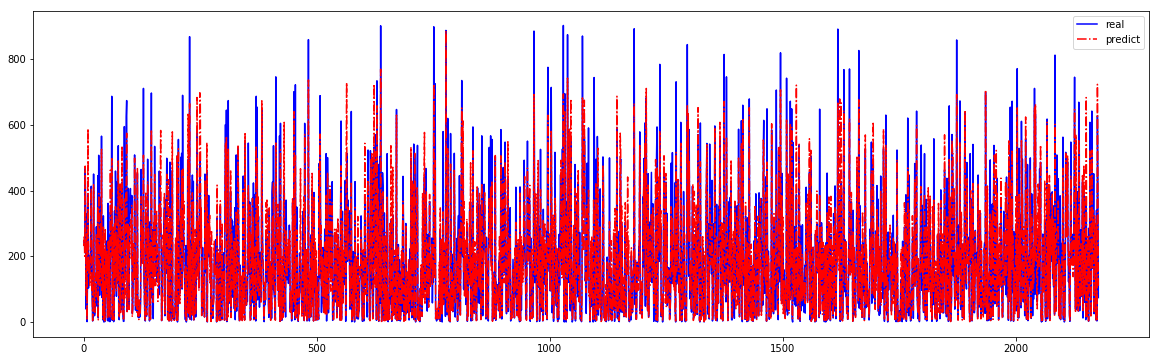

In [137]:
# 可视化一下随机森林的预测结果
fig = plt.figure(figsize=(20,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
y_pred = rf_model.predict(x_test)
plt.plot(range(y_test.shape[0]),y_test,color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(y_test.shape[0]),y_pred,color="red", linewidth=1.5, linestyle="-.")
plt.legend(['real','predict'])
plt.show() ##显示图片

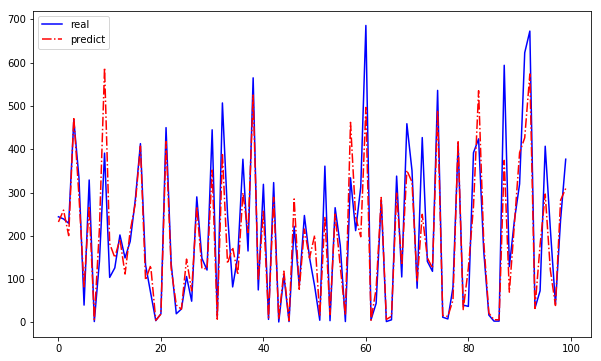

In [139]:
fig = plt.figure(figsize=(10,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(range(len(y_test[:100])),y_test[:100],color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(len(y_test[:100])),y_pred[:100],color="red", linewidth=1.5, linestyle="-.")
plt.legend(['real','predict'])
# 保存一下图片
plt.savefig("随机森林预测结果.png")
plt.show() ##显示图片

大部分还是预测正确的

In [140]:
# 预测变量的重要性
feat_labels = df_copy.drop(['count'], axis=1).columns[0:]

In [141]:
# 查看一下提取的特征标签
feat_labels

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'day', 'hour'],
      dtype='object')

In [142]:
rf_model.feature_importances_

array([0.01358567, 0.00266969, 0.04224361, 0.01939241, 0.10466294,
       0.04342708, 0.06408205, 0.0263968 , 0.04044337, 0.04948872,
       0.59360767])

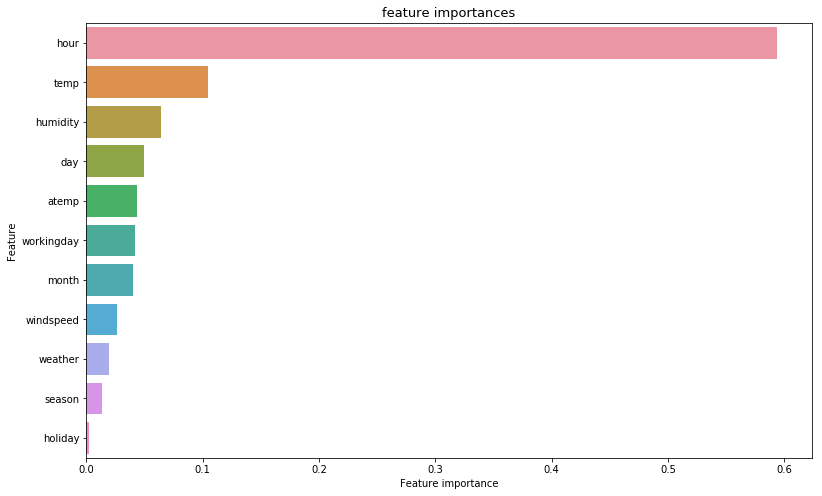

In [143]:
tmp = pd.DataFrame({'Feature': feat_labels, 'Feature importance': rf_model.feature_importances_})
# ascending 设置为false代表降序排列
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (13,8))
plt.title('feature importances',fontsize=13)
s = sns.barplot(x='Feature importance',y='Feature',data=tmp)
plt.savefig("特征重要性可视化.png")
plt.show()